In [1]:
from helpers import *

# import numpy as np
# from plot_params import *
# from scipy.spatial.distance import cdist
# from copy import deepcopy
# from tqdm import tqdm
# from joblib import Parallel, delayed
# from matplotlib.animation import FuncAnimation


- different cooling schedules
- length of markov chain
- variable stepsize 
- optimal configuration for several n charges

# Figures:
- exp vs log cooling for n = 12, 30, 56, 92

- MC length of 100, 200, 400 for n = 12, 30, 56, 92 using best cooling schedule

- variable stepsize 0.5 to 0.25, 0.1, 0.05 for best MC length

In [2]:
"""
Points for in discussion
- extend to 3d
- reannealing
- other methods of solving, like genetic algorithm
- mor extensive parameter search
"""

'\nPoints for in discussion\n- extend to 3d\n- reannealing\n- other methods of solving, like genetic algorithm\n- mor extensive parameter search\n'

In [3]:
"""
TODO: 
- Different cooling schedules
- Decrease stepsize

Figures:
- Examples using both cooling schemes with n = 12, 30, 56, include the variability
- 
"""

'\nTODO: \n- Different cooling schedules\n- Decrease stepsize\n\nFigures:\n- Examples using both cooling schemes with n = 12, 30, 56, include the variability\n- \n'

In [4]:
def cooling_logistic(steps, B, vu, M):
    i = np.linspace(10, 1, steps)
    T = 1 / (1 + np.exp(- B * (i - M)) ** (1 / vu)) 
    return T

def cooling_exponential(steps, T_init, constant):
    T = np.zeros(steps)
    for i in range(steps):
        T[i] = T_init*pow(constant,i)
    return T

Exp 2


100%|██████████| 10/10 [00:12<00:00,  1.27s/it]


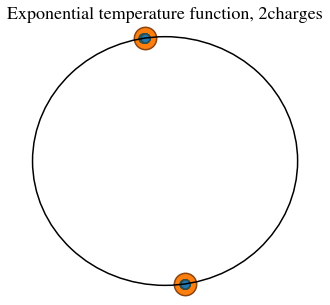

variability: 0.00433679914713824
lowest 0.5
highest 0.5
mean 0.5
std 0.0
Exp 3


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]


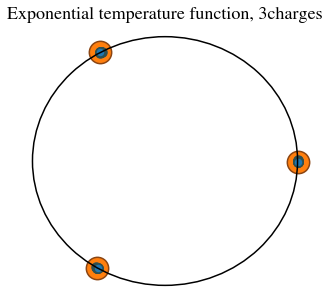

variability: 0.010255959461123811
lowest 1.732
highest 1.732
mean 1.732
std 0.0
Exp 4


100%|██████████| 10/10 [00:09<00:00,  1.07it/s]


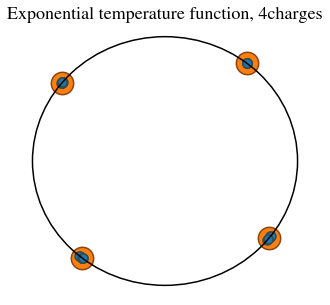

variability: 0.02433951563683633
lowest 3.828
highest 3.829
mean 3.829
std 0.0
Exp 5


100%|██████████| 10/10 [00:14<00:00,  1.43s/it]


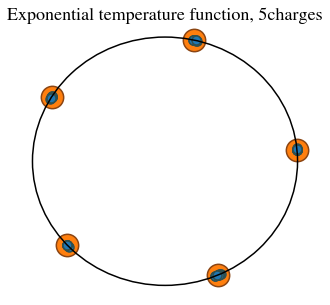

variability: 0.03948428727303381
lowest 6.883
highest 6.884
mean 6.883
std 0.0


In [5]:
# test with exponential cooling

# simulation setings
n_attemps_per_run = 25
n_runs = 10
circle_radius = 1

# simulation parameters
n_steps = 200
stepsize_init = 0.05
stepsize_final = 0.05
random_influence = 1
force_influence = 1

# parameters for exponential cooling function
T_init = 1
constant = 0.965
temperature = cooling_exponential(n_steps, T_init, constant)

# # parameters for logistic cooling function
# B = 7
# vu = 5
# M = 5
# temperature = cooling_logistic(n_steps, B, vu, M)

n_charges_range = [12, 30, 56, 92]
n_charges_range = [2, 3, 4, 5]


for n_charges in n_charges_range:
    print(f'\nExp {n_charges}')

    # initialize simulation
    cc = CircleCharges(
        n_charges, 
        n_attemps_per_run, 
        n_runs, 
        circle_radius, 
        n_steps, 
        stepsize_init, 
        stepsize_final, 
        random_influence, 
        force_influence, 
        temperature
    )

    # run the simulation
    cc.run()

    # produce image 
    title = f'Exponential temperature function, {n_charges} charges'
    savepath = f'figures/Exponential_temp_{n_charges}.pdf'
    cc.produce_figure(title=title, savepath=savepath)

    # give score 
    print('variability:', cc.get_variability_score())

    # give energy 
    cc.print_energy_overview()

In [6]:
# logis = [0.10949671551150883, 0.4867656612583355, 1.4263813830661713]
# Elog = [59.593815792424515, 479.2326104705806, 1863.5758345837085]
# exp = [0.05094500421005248, 0.5351001967937413, 1.5261874742110426]
# Eexp = [59.5786870175965, 479.24685537114567, 1863.9356120411128]

In [7]:
# rs = RunSimulation(
#     n_charges,
#     circle_radius,
#     n_steps, 
#     stepsize_init,
#     stepsize_final,
#     random_influence, 
#     force_influence,
#     temperature
# )
# final_pos = rs.run()


# frames = 50
# sec = 5
# pos_animate = rs.pos_history[::n_steps//frames]
# fig, ax = plt.subplots(figsize=(7, 7))
# plot = ax.scatter(pos_animate[0, :, 0], pos_animate[0, :, 1])
# text = ax.text(0.1, 0.9, '', fontsize=10)
# circle = plt.Circle((0, 0), 1, fill=False)
# plt.gca().add_patch(circle)
# ax.set(xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))

# def anim_func(i):
#     plot.set_offsets(pos_animate[i])
#     text.set_text(f'{i}/{frames}')
#     return plot

# animation = FuncAnimation(
#     fig, 
#     anim_func, 
#     frames=frames, 
#     interval=sec / frames * 1e3, 
#     save_count=frames
# )
# animation.save(f'kaas.mp4', dpi=100)